# German Credit - Data Exploration #

In [2]:
import pandas as pd
import seaborn as sns

df = pd.read_pickle("data/df_labeled.pickle")
print(df.shape)
df.head(10)

(1000, 21)


,Account_Balance,Loan_Duration,Credit_History,Loan_Purpose,Loan_Amount,Savings,Years_Employed,Installment_Rate,Gender_and_Status,Other_Debtors_Guarantors,...,Property,Age,Installment_Plans,Housing,Existing_Credits,Job,Dependents,Telephone,Foreign,Credit_Rating
0,(A11) ... < 0 DM,6,(A34) critical account/,(A43) radio/television,1169,(A65) unknown/ no savings account,(A75) .. >= 7 years,4,(A93) male : single,(A101) none,...,(A121) real estate,67,(A143) none,(A152) own,2,(A173) skilled employee / official,1,"(A192) yes, registered under the customers name",(A201) yes,1
1,(A12) 0 <= ... < 200 DM,48,(A32) existing credits paid back duly till now,(A43) radio/television,5951,(A61) ... < 100 DM,(A73) 1 <= ... < 4 years,2,(A92) female : divorced/separated/married,(A101) none,...,(A121) real estate,22,(A143) none,(A152) own,1,(A173) skilled employee / official,1,(A191) none,(A201) yes,2
2,(A14) no checking account,12,(A34) critical account/,(A46) education,2096,(A61) ... < 100 DM,(A74) 4 <= ... < 7 years,2,(A93) male : single,(A101) none,...,(A121) real estate,49,(A143) none,(A152) own,1,(A172) unskilled - resident,2,(A191) none,(A201) yes,1
3,(A11) ... < 0 DM,42,(A32) existing credits paid back duly till now,(A42) furniture/equipment,7882,(A61) ... < 100 DM,(A74) 4 <= ... < 7 years,2,(A93) male : single,(A103) guarantor,...,(A122) if not A121 : building society savings ...,45,(A143) none,(A153) for free,1,(A173) skilled employee / official,2,(A191) none,(A201) yes,1
4,(A11) ... < 0 DM,24,(A33) delay in paying off in the past,(A40) car (new),4870,(A61) ... < 100 DM,(A73) 1 <= ... < 4 years,3,(A93) male : single,(A101) none,...,(A124) unknown / no property,53,(A143) none,(A153) for free,2,(A173) skilled employee / official,2,(A191) none,(A201) yes,2
5,(A14) no checking account,36,(A32) existing credits paid back duly till now,(A46) education,9055,(A65) unknown/ no savings account,(A73) 1 <= ... < 4 years,2,(A93) male : single,(A101) none,...,(A124) unknown / no property,35,(A143) none,(A153) for free,1,(A172) unskilled - resident,2,"(A192) yes, registered under the customers name",(A201) yes,1
6,(A14) no checking account,24,(A32) existing credits paid back duly till now,(A42) furniture/equipment,2835,(A63) 500 <= ... < 1000 DM,(A75) .. >= 7 years,3,(A93) male : single,(A101) none,...,(A122) if not A121 : building society savings ...,53,(A143) none,(A152) own,1,(A173) skilled employee / official,1,(A191) none,(A201) yes,1
7,(A12) 0 <= ... < 200 DM,36,(A32) existing credits paid back duly till now,(A41) car (used),6948,(A61) ... < 100 DM,(A73) 1 <= ... < 4 years,2,(A93) male : single,(A101) none,...,"(A123) if not A121/A122 : car or other, not in...",35,(A143) none,(A151) rent,1,(A174) management/ self-employed/,1,"(A192) yes, registered under the customers name",(A201) yes,1
8,(A14) no checking account,12,(A32) existing credits paid back duly till now,(A43) radio/television,3059,(A64) .. >= 1000 DM,(A74) 4 <= ... < 7 years,2,(A91) male : divorced/separated,(A101) none,...,(A121) real estate,61,(A143) none,(A152) own,1,(A172) unskilled - resident,1,(A191) none,(A201) yes,1
9,(A12) 0 <= ... < 200 DM,30,(A34) critical account/,(A40) car (new),5234,(A61) ... < 100 DM,(A71) unemployed,4,(A94) male : married/widowed,(A101) none,...,"(A123) if not A121/A122 : car or other, not in...",28,(A143) none,(A152) own,2,(A174) management/ self-employed/,1,(A191) none,(A201) yes,2


Q1: What is the total of Loan_Amount?

In [3]:
df.Loan_Amount.sum()

3271258

Q2: What is the mean Loan_Duration to 2DP?

In [4]:
df.Loan_Duration.mean()

20.903

Q3: What is the standard deviation of Loan_Amount (to 2DP)?

In [5]:
df.Loan_Amount.std()

2822.73687596044

Q4: What is the mean Loan_Amount for applications that have Year_of_Residence equal to 1 (answer to 2DP)?

In [6]:
df.loc[df.Year_of_Residence == 1].Loan_Amount.mean()

2926.776923076923

Q5: What is the range of Loan_Amount?

In [7]:
df.Loan_Amount.max() - df.Loan_Amount.min()

18174

Q6: Classify the Age distribution as: Left-skewed, Symmetric, Right-skewed

<AxesSubplot: xlabel='Age', ylabel='Count'>

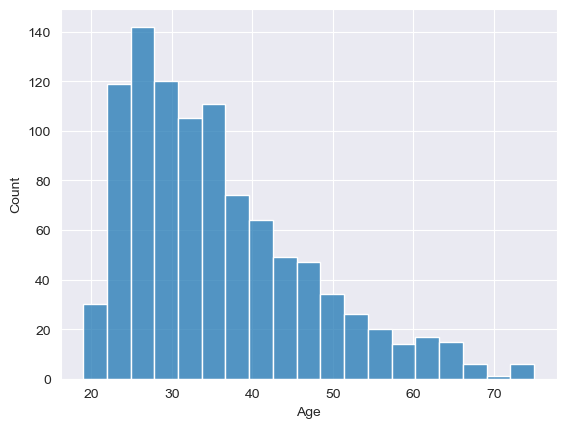

In [8]:
sns.histplot(data = df, x = df.Age)

Q7: What is the interquartile range (IQR) of Loan_Amount (to 2DP)?

In [9]:
df.Loan_Amount.quantile(0.75) - df.Loan_Amount.quantile(0.25)

2606.75

Q8: Using the 1.5*IQR from the quartiles rule, how many outlier observations are in Loan_Amount?

In [10]:
iqr = (df.Loan_Amount.quantile(0.75) - df.Loan_Amount.quantile(0.25)) * 1.5
iqr

3910.125

In [11]:
df.loc[df.Loan_Amount < df.Loan_Amount.quantile(0.25) - iqr].Loan_Amount.count() +\
df.loc[df.Loan_Amount > df.Loan_Amount.quantile(0.75) + iqr].Loan_Amount.count()

72

Q9: What is the third most popular reason cited for loan?

In [12]:
df.Loan_Purpose.value_counts()

(A43) radio/television       280
(A40) car (new)              234
(A42) furniture/equipment    181
(A41) car (used)             103
(A49) business                97
(A46) education               50
(A45) repairs                 22
(A44) domestic appliances     12
(A410) others                 12
(A48) retraining               9
Name: Loan_Purpose, dtype: int64

Q10: How many distinct reasons are cited for asking for a loan?

In [13]:
df.Loan_Purpose.describe()

count                       1000
unique                        10
top       (A43) radio/television
freq                         280
Name: Loan_Purpose, dtype: object

Q11: Which reason cited for loan has the highest rate of bad claims?

In [14]:
df.Loan_Purpose.loc[df.Credit_Rating == 2].value_counts().head(1)

(A40) car (new)    89
Name: Loan_Purpose, dtype: int64

Q12: Which Credit_History has the lowest rate of bad claims?

In [15]:
df.Credit_History.loc[df.Credit_Rating == 2].value_counts().tail(1)

(A30) no credits taken/    25
Name: Credit_History, dtype: int64

Q13: What is the average age of applicants that have Credit_Rating of Bad?

In [16]:
df.loc[df.Credit_Rating == 2].Age.mean()

33.96333333333333

Q14: How many reasons cited for loans have a mean Loan_Duration greater than the mean of Loan_Duration overall?

In [17]:
(df.groupby(df.Loan_Purpose).Loan_Duration.mean() > df.Loan_Duration.mean()).sum()

4

Q15: What is the correlation between Loan_Duration and Loan_Amount (to 2DP)?

In [18]:
df.Loan_Duration.corr(df.Loan_Amount)

0.6249841983009832

Q16: What is the probability of an applicant is female? (enter answer as a decimal to 2DP)?

In [19]:
df.loc[df.Gender_and_Status.str.contains("female")].Gender_and_Status.count() / len(df)

0.31

Q17: What is the probability of an applicant that owns their own property, does not have a telephone? (enter answer as a decimal to 2DP)?

In [20]:
df.loc[df.Housing.str.contains("own")].loc[df.Telephone.str.contains("none")].Gender_and_Status.count() / len(df)

0.433

Q18: Which categorical feature has the most impact on the target (using chi2 as the metric)?

In [22]:
df

,Account_Balance,Loan_Duration,Credit_History,Loan_Purpose,Loan_Amount,Savings,Years_Employed,Installment_Rate,Gender_and_Status,Other_Debtors_Guarantors,...,Property,Age,Installment_Plans,Housing,Existing_Credits,Job,Dependents,Telephone,Foreign,Credit_Rating
0,(A11) ... < 0 DM,6,(A34) critical account/,(A43) radio/television,1169,(A65) unknown/ no savings account,(A75) .. >= 7 years,4,(A93) male : single,(A101) none,...,(A121) real estate,67,(A143) none,(A152) own,2,(A173) skilled employee / official,1,"(A192) yes, registered under the customers name",(A201) yes,1
1,(A12) 0 <= ... < 200 DM,48,(A32) existing credits paid back duly till now,(A43) radio/television,5951,(A61) ... < 100 DM,(A73) 1 <= ... < 4 years,2,(A92) female : divorced/separated/married,(A101) none,...,(A121) real estate,22,(A143) none,(A152) own,1,(A173) skilled employee / official,1,(A191) none,(A201) yes,2
2,(A14) no checking account,12,(A34) critical account/,(A46) education,2096,(A61) ... < 100 DM,(A74) 4 <= ... < 7 years,2,(A93) male : single,(A101) none,...,(A121) real estate,49,(A143) none,(A152) own,1,(A172) unskilled - resident,2,(A191) none,(A201) yes,1
3,(A11) ... < 0 DM,42,(A32) existing credits paid back duly till now,(A42) furniture/equipment,7882,(A61) ... < 100 DM,(A74) 4 <= ... < 7 years,2,(A93) male : single,(A103) guarantor,...,(A122) if not A121 : building society savings ...,45,(A143) none,(A153) for free,1,(A173) skilled employee / official,2,(A191) none,(A201) yes,1
4,(A11) ... < 0 DM,24,(A33) delay in paying off in the past,(A40) car (new),4870,(A61) ... < 100 DM,(A73) 1 <= ... < 4 years,3,(A93) male : single,(A101) none,...,(A124) unknown / no property,53,(A143) none,(A153) for free,2,(A173) skilled employee / official,2,(A191) none,(A201) yes,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,(A14) no checking account,12,(A32) existing credits paid back duly till now,(A42) furniture/equipment,1736,(A61) ... < 100 DM,(A74) 4 <= ... < 7 years,3,(A92) female : divorced/separated/married,(A101) none,...,(A121) real estate,31,(A143) none,(A152) own,1,(A172) unskilled - resident,1,(A191) none,(A201) yes,1
996,(A11) ... < 0 DM,30,(A32) existing credits paid back duly till now,(A41) car (used),3857,(A61) ... < 100 DM,(A73) 1 <= ... < 4 years,4,(A91) male : divorced/separated,(A101) none,...,(A122) if not A121 : building society savings ...,40,(A143) none,(A152) own,1,(A174) management/ self-employed/,1,"(A192) yes, registered under the customers name",(A201) yes,1
997,(A14) no checking account,12,(A32) existing credits paid back duly till now,(A43) radio/television,804,(A61) ... < 100 DM,(A75) .. >= 7 years,4,(A93) male : single,(A101) none,...,"(A123) if not A121/A122 : car or other, not in...",38,(A143) none,(A152) own,1,(A173) skilled employee / official,1,(A191) none,(A201) yes,1
998,(A11) ... < 0 DM,45,(A32) existing credits paid back duly till now,(A43) radio/television,1845,(A61) ... < 100 DM,(A73) 1 <= ... < 4 years,4,(A93) male : single,(A101) none,...,(A124) unknown / no property,23,(A143) none,(A153) for free,1,(A173) skilled employee / official,1,"(A192) yes, registered under the customers name",(A201) yes,2


In [59]:
from scipy.stats import chi2_contingency
con_table = pd.crosstab(df.Credit_Rating, [df.Foreign], normalize="all");
c, p, dof, expected = chi2_contingency(con_table)
p

1.0

In [56]:
con_table = pd.crosstab(df.Credit_Rating, [df.Telephone], normalize="all");
c, p, dof, expected = chi2_contingency(con_table)
p

1.0